# Deep learning with AlexNet and cifar10

cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follow the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras  # Keras is the high-level API of TensorFlow

/Users/khangnghiem/hcmus/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/khangnghiem/hcmus/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/khangnghiem/hcmus/.venv/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/resource_handle.proto. Please update

: 

In [ ]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

NameError: name 'tf' is not defined

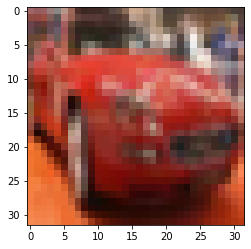

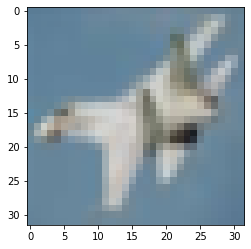

In [ ]:
# Show some samples in the dataset
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [ ]:
# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Val shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


## Build AlexNet model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Initialize AlexNet as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
AlexNet = Sequential(name='AlexNet')

# Block 1
AlexNet.add(
    Conv2D(filters=96, input_shape=(32, 32, 3), kernel_size=(11, 11), strides=(4, 4), padding='same', name='Block_1_Conv')
)  # padding="same" means input and output have the same spatial dimension.
AlexNet.add(Activation('relu'))  # Add RELU activation function
AlexNet.add(
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='Block_1_MaxPool')
)  # Overlapping MaxPooling since the pooling kernel (3x3) is larger than the pooing stride (2x2).

# Block 2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', name='Block_2_Conv'))
AlexNet.add(Activation('relu'))  # Shorter way wot write: AlexNet.add(Conv2D(..., activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='Block_2_maxPool'))

# Block 3
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', name='Block_3_Conv'))
AlexNet.add(Activation('relu'))

# Block 4
AlexNet.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', name='Block_4_Conv'))
AlexNet.add(Activation('relu'))

# Block 5
AlexNet.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', name='Block_5_Conv'))
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='Block_5_MaxPool'))

# Flatten
AlexNet.add(Flatten())  # Reshape the tensor to 1D tensor so that it can be used as input of a fully connected (fc) layer

# Fully connected (FC) layer 1
AlexNet.add(Dense(4096))
AlexNet.add(Activation('relu'))  # Shorter way wot write: AlexNet.add(Dense(4096, activation='relu'))
AlexNet.add(Dropout(rate=0.4))  # Dropout with drop rate. This is to force the layer to learn general features.

# Fully connected (FC) layer 2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(rate=0.4))

# Fully connected (FC) layer 3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(rate=0.4))

# Fully connected (FC) layer 3
AlexNet.add(Dense(10))  # Number of output classes
AlexNet.add(Activation('softmax'))  # Classification network often ends with softmax activation function.

# Model Summary
AlexNet.summary()

# Example of non-trainable parameters: statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Block_1_Conv (Conv2D)       (None, 8, 8, 96)          34944     
                                                                 
 activation_49 (Activation)  (None, 8, 8, 96)          0         
                                                                 
 Block_1_MaxPool (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 Block_2_Conv (Conv2D)       (None, 4, 4, 256)         614656    
                                                                 
 activation_50 (Activation)  (None, 4, 4, 256)         0         
                                                                 
 Block_2_maxPool (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                       

There are two popular losses for a classification problem: categorical_crossentropy and sparse_categorical_crossentropy
* categorical_crossentropy requires one-hot encoding label.
* sparse_categorical_crossentropy requires integer label. This is called sparse since the label representation requires much less space than one-hot encoding

In [ ]:
# Compile the model
AlexNet.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,  # Define loss function
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    metrics=['accuracy'],
)  # Define initial learning rate and metrics.

# Train

In [ ]:
### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one.
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(
    filepath="epoch-{epoch:02d}.hdf5",  # Path to save the model
    monitor='val_loss',  # Metric to evaluate the model performance when looking for a better model.
    mode='min',  # mode='auto'/'max'/'min': the monitor should be max/min to be better.
    # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
    verbose=0,  # Inform every time a better model is found and saved.
    save_best_only=True,
)  # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = AlexNet.fit(
    X_train,
    y_train,  # Data feature and data label
    batch_size=512,  # Batch size
    epochs=30,  # Number of training epochs
    validation_data=(X_val, y_val),  # Validation set
    callbacks=[mc],
)  # Use callback ModelCheckpoint during the training

Epoch 1/30
88/88 [==============================] - 7s 73ms/step - loss: 2.0114 - accuracy: 0.2762 - val_loss: 2.2978 - val_accuracy: 0.1062
Epoch 2/30
88/88 [==============================] - 6s 69ms/step - loss: 1.5482 - accuracy: 0.4314 - val_loss: 2.2857 - val_accuracy: 0.1352
Epoch 3/30
88/88 [==============================] - 6s 70ms/step - loss: 1.3982 - accuracy: 0.4886 - val_loss: 2.2550 - val_accuracy: 0.2636
Epoch 4/30
88/88 [==============================] - 6s 69ms/step - loss: 1.2907 - accuracy: 0.5326 - val_loss: 2.1904 - val_accuracy: 0.3254
Epoch 5/30
88/88 [==============================] - 6s 69ms/step - loss: 1.2134 - accuracy: 0.5642 - val_loss: 2.0572 - val_accuracy: 0.3748
Epoch 6/30
88/88 [==============================] - 6s 69ms/step - loss: 1.1486 - accuracy: 0.5862 - val_loss: 1.7933 - val_accuracy: 0.4614
Epoch 7/30
88/88 [==============================] - 6s 71ms/step - loss: 1.0781 - accuracy: 0.6135 - val_loss: 1.4382 - val_accuracy: 0.5390
Epoch 8/30
88

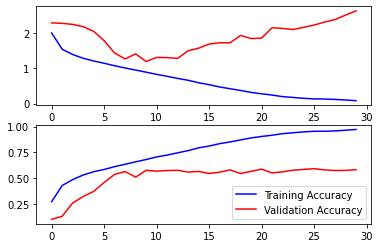

In [ ]:
# Visualize training and validation performance
f, ax = plt.subplots(2, 1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')

plt.legend()

In [ ]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/epoch-07.hdf5")
result = AlexNet.evaluate(X_test, y_test)  # If unspecified, batch_size will default to 32

313/313 [==============================] - 2s 6ms/step - loss: 2.5482 - accuracy: 0.5972


In [ ]:
# Show the model performance
print(AlexNet.metrics_names)  # result[0] is loss, result[1] is accuracy. The metrics are defined in AlexNet.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0], result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 2.5481998920440674, accuracy = 0.5971999764442444


In [61]:
# This is to delete all saved models (*.hdf5) in the current directory

'''import os
import glob
# Get a list of all the file paths that ends with .txt from in specified directory
fileList = glob.glob('*.hdf5')
# Iterate over the list of filepaths & remove each file.
for filePath in fileList:
  try:
    os.remove(filePath)
  except:
    print("Error while deleting file : ", filePath)'''

'import os\nimport glob\n# Get a list of all the file paths that ends with .txt from in specified directory\nfileList = glob.glob(\'*.hdf5\')\n# Iterate over the list of filepaths & remove each file.\nfor filePath in fileList:\n  try:\n    os.remove(filePath)\n  except:\n    print("Error while deleting file : ", filePath)'